# First contact with Keras/Tensorflow

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tensorflow-and-Keras-installation" data-toc-modified-id="Tensorflow-and-Keras-installation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tensorflow and Keras installation</a></span></li><li><span><a href="#A-full-Keras-example-for-regression" data-toc-modified-id="A-full-Keras-example-for-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>A full Keras example for regression</a></span></li><li><span><a href="#A-full-Keras-example-for-classification" data-toc-modified-id="A-full-Keras-example-for-classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>A full Keras example for classification</a></span></li></ul></div>

## Tensorflow and Keras installation

2 solutions:
* use Google Colab notebook: all is installed
* try to install on your computer: https://www.tensorflow.org/install/
    * before starting the installation: check before the requirement)
    * install tensorflow >= 2.0

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
# install tensorflow
#!pip install --upgrade tensorflow

In [3]:
# test your keras/tensorflow installation
from keras.models import Sequential

model = Sequential()
model.compile(optimizer="sgd")

## A full Keras example for regression

In [4]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Generate regression dataset
N_items = 200
N_features = 10
X, y = make_regression(n_samples=N_items, n_features=N_features, noise=0.1, random_state=1)

# Normalize features
scalarX = MinMaxScaler()
scalarX.fit(X)
X = scalarX.transform(X)

# Normalize target value
scalarY = MinMaxScaler()
scalarY.fit(y.reshape(N_items,1))
y = scalarY.transform(y.reshape(N_items,1))

# Split dataset into train and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape

((160, 10), (160, 1))

In [5]:
''' define and compile the model '''
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense


# This returns a tensor
inputs = Input(shape=(N_features,))

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(16, activation='relu')(inputs)
output_2 = Dense(8, activation='relu')(output_1)
predictions = Dense(1, activation='linear')(output_2)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [6]:
# fit the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.33)

Epoch 1/100
4/4 [==============================] - 0s 46ms/step - loss: 0.1903 - mean_absolute_error: 0.3970 - val_loss: 0.1657 - val_mean_absolute_error: 0.3541
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1381 - mean_absolute_error: 0.3273 - val_loss: 0.1244 - val_mean_absolute_error: 0.2963
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1051 - mean_absolute_error: 0.2798 - val_loss: 0.0962 - val_mean_absolute_error: 0.2517
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0828 - mean_absolute_error: 0.2427 - val_loss: 0.0773 - val_mean_absolute_error: 0.2206
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0677 - mean_absolute_error: 0.2175 - val_loss: 0.0642 - val_mean_absolute_error: 0.1989
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0568 - mean_absolute_error: 0.1973 - val_loss: 0.0548 - val_mean_absolute_error: 0.1807
Epoch 7/100
4/4 [================

4/4 [==============================] - 0s 8ms/step - loss: 0.0319 - mean_absolute_error: 0.1513 - val_loss: 0.0367 - val_mean_absolute_error: 0.1499
Epoch 51/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0319 - mean_absolute_error: 0.1513 - val_loss: 0.0367 - val_mean_absolute_error: 0.1497
Epoch 52/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0317 - mean_absolute_error: 0.1510 - val_loss: 0.0366 - val_mean_absolute_error: 0.1496
Epoch 53/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0316 - mean_absolute_error: 0.1507 - val_loss: 0.0365 - val_mean_absolute_error: 0.1495
Epoch 54/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0315 - mean_absolute_error: 0.1502 - val_loss: 0.0364 - val_mean_absolute_error: 0.1493
Epoch 55/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0314 - mean_absolute_error: 0.1501 - val_loss: 0.0363 - val_mean_absolute_error: 0.1491
Epoch 56/100
4/4 [=======================

In [7]:
model. metrics_names

['loss', 'mean_absolute_error']

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


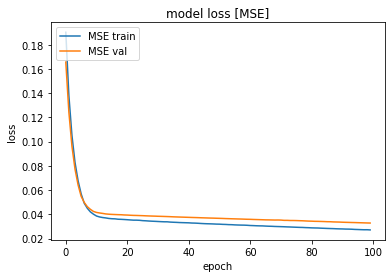

In [8]:
''' Plot learning curve '''
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss [MSE]')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['MSE train', 'MSE val'], loc='upper left')
plt.show()

In [9]:
y_pred = model.predict(X_test)

In [10]:
model.metrics_names

['loss', 'mean_absolute_error']

In [11]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0306 - mean_absolute_error: 0.1319


[0.030582109466195107, 0.13186155259609222]

## A full Keras example for classification

In [12]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# generate regression dataset
N_items = 200
N_features = 20
N_classes = 3
X, y = make_classification(n_samples=N_items, n_features=N_features, n_classes=N_classes, n_informative=3, random_state=1)

# Normalize features
scalarX = MinMaxScaler()
scalarX.fit(X)
X = scalarX.transform(X)

# One Hot Encode labels
y = np.eye(N_classes)[y]

# Split dataset into train and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape

((160, 20), (160, 3))

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.metrics import Recall

''' define and compile the model '''

# This returns a tensor
inputs = Input(shape=(N_features,))

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(16, activation='relu')(inputs)
output_2 = Dense(8, activation='relu')(output_1)
predictions = Dense(N_classes, activation='softmax')(output_2)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
                  metrics=['accuracy', Recall()])

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 27        
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [14]:
# fit the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.33)

Epoch 1/100
4/4 [==============================] - 0s 113ms/step - loss: 1.1076 - accuracy: 0.2897 - recall: 0.0187 - val_loss: 1.1241 - val_accuracy: 0.2830 - val_recall: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 1.1052 - accuracy: 0.3458 - recall: 0.0093 - val_loss: 1.1206 - val_accuracy: 0.3019 - val_recall: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 1.1018 - accuracy: 0.3832 - recall: 0.0093 - val_loss: 1.1152 - val_accuracy: 0.3208 - val_recall: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 1.0993 - accuracy: 0.3645 - recall: 0.0000e+00 - val_loss: 1.1144 - val_accuracy: 0.3208 - val_recall: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0985 - accuracy: 0.3645 - recall: 0.0000e+00 - val_loss: 1.1125 - val_accuracy: 0.3396 - val_recall: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0975 - acc

4/4 [==============================] - 0s 9ms/step - loss: 1.0791 - accuracy: 0.4673 - recall: 0.0000e+00 - val_loss: 1.0791 - val_accuracy: 0.4717 - val_recall: 0.0000e+00
Epoch 46/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0788 - accuracy: 0.4673 - recall: 0.0000e+00 - val_loss: 1.0792 - val_accuracy: 0.4717 - val_recall: 0.0000e+00
Epoch 47/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0784 - accuracy: 0.4579 - recall: 0.0000e+00 - val_loss: 1.0786 - val_accuracy: 0.4528 - val_recall: 0.0000e+00
Epoch 48/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0781 - accuracy: 0.4766 - recall: 0.0000e+00 - val_loss: 1.0792 - val_accuracy: 0.4528 - val_recall: 0.0000e+00
Epoch 49/100
4/4 [==============================] - 0s 10ms/step - loss: 1.0784 - accuracy: 0.4673 - recall: 0.0000e+00 - val_loss: 1.0786 - val_accuracy: 0.4528 - val_recall: 0.0000e+00
Epoch 50/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0773 - a

4/4 [==============================] - 0s 9ms/step - loss: 1.0625 - accuracy: 0.5327 - recall: 0.0000e+00 - val_loss: 1.0612 - val_accuracy: 0.4717 - val_recall: 0.0000e+00
Epoch 89/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0620 - accuracy: 0.5421 - recall: 0.0000e+00 - val_loss: 1.0613 - val_accuracy: 0.4717 - val_recall: 0.0000e+00
Epoch 90/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0619 - accuracy: 0.5421 - recall: 0.0000e+00 - val_loss: 1.0600 - val_accuracy: 0.4906 - val_recall: 0.0000e+00
Epoch 91/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0611 - accuracy: 0.5514 - recall: 0.0000e+00 - val_loss: 1.0589 - val_accuracy: 0.4906 - val_recall: 0.0000e+00
Epoch 92/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0611 - accuracy: 0.5421 - recall: 0.0000e+00 - val_loss: 1.0584 - val_accuracy: 0.4717 - val_recall: 0.0000e+00
Epoch 93/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0607 - ac

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])


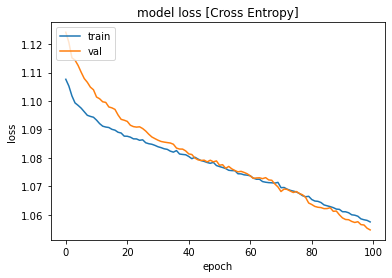

In [15]:
''' Plot learning curve '''
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss [Cross Entropy]')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
y_pred = model.predict(X_test)

In [17]:
model.metrics_names

['loss', 'accuracy', 'recall']

In [18]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 1.0508 - accuracy: 0.3750 - recall: 0.0250


[1.0507551431655884, 0.375, 0.02500000037252903]